In [32]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Importing and Setuping Up Dataset

In [48]:
df = pd.read_csv('games.csv', low_memory=False)
gg = pd.read_csv('good_games.csv', low_memory=False)
df = df.append(gg)
df.head()

,Unnamed: 0,Event,Result,White Rating,Black Rating,Eco,Opening,Termination,Turns
0,0,Rated Blitz game,0-1,1346,1550,D00,Queen's Pawn Game,Time forfeit,NaN
1,1,Rated Classical game,1-0,1591,1377,C41,Philidor Defense #2,Normal,NaN
2,2,Rated Blitz game,1-0,1501,1447,C00,French Defense: La Bourdonnais Variation,Normal,NaN
3,3,Rated Blitz tournament,1-0,1674,1315,C50,Italian Game,Normal,NaN
4,4,Rated Bullet game,1-0,1945,1557,A00,Hungarian Opening,Time forfeit,NaN


In [49]:
df_sample = df.sample(n=10000, random_state=1337)

In [50]:
# Remove uncalibrated games
df = df[df['White Rating'] != '?']
df = df[df['Black Rating'] != '?']

In [51]:
df = df.astype({
    'White Rating': int,
    'Black Rating': int,
})

In [52]:
df['Rating Diff'] = abs(df['White Rating'] - df['Black Rating'])
df['Avg Rating'] = (df['White Rating'] + df['Black Rating']) / 2

# Rating Analysis

In [37]:
Rating_Ranges = [1200, 1400, 1600, 1800, 2000, 2200]

(775.999, 1200.0]     63768
(1200.0, 1400.0]     257862
(1400.0, 1600.0]     574210
(1600.0, 1800.0]     605629
(1800.0, 2000.0]     346281
(2000.0, 2200.0]     101126
(2200.0, 3053.0]     273874
dtype: int64

<AxesSubplot:>

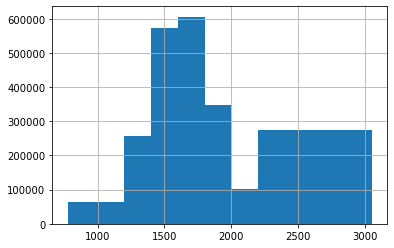

In [53]:
rating = df['White Rating'].append(df['Black Rating'], ignore_index=True)
bins = [rating.min()] + Rating_Ranges + [rating.max()]
display(rating.value_counts(bins=bins, sort=False))
rating.hist(bins=bins)

(-1.623, 81.1]      391033
(81.1, 162.2]       260387
(162.2, 243.3]      151328
(243.3, 324.4]       82829
(324.4, 405.5]       45007
(405.5, 486.6]       24289
(486.6, 567.7]       13311
(567.7, 648.8]        6957
(648.8, 729.9]        3879
(729.9, 811.0]        2244
(811.0, 892.1]        1021
(892.1, 973.2]         495
(973.2, 1054.3]        221
(1054.3, 1135.4]        75
(1135.4, 1216.5]        29
(1216.5, 1297.6]        17
(1297.6, 1378.7]         5
(1378.7, 1459.8]         7
(1459.8, 1540.9]         1
(1540.9, 1622.0]         1
Name: Rating Diff, dtype: int64

<AxesSubplot:>

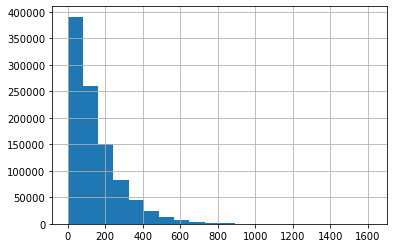

In [9]:
display(df['Rating Diff'].value_counts(bins=20, sort=False))
df['Rating Diff'].hist(bins=20)

(885.499, 1200.0]     17539
(1200.0, 1400.0]     120874
(1400.0, 1600.0]     308128
(1600.0, 1800.0]     328036
(1800.0, 2000.0]     161989
(2000.0, 2200.0]      41215
(2200.0, 2618.0]       5355
Name: Avg Rating, dtype: int64

<AxesSubplot:>

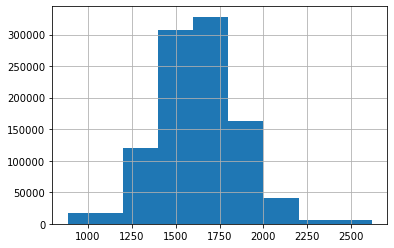

In [10]:
avg_bins = [df['Avg Rating'].min()] + Rating_Ranges + [df['Avg Rating'].max()]
display(df['Avg Rating'].value_counts(bins=avg_bins, sort=False))
df['Avg Rating'].hist(bins=avg_bins)

In [11]:
df['Event'].value_counts()

Rated Blitz game               378028
Rated Classical game           278537
Rated Bullet game              229353
Rated Blitz tournament          55485
Rated Bullet tournament         36461
Rated Classical tournament       2891
Rated Correspondence game        2381
Name: Event, dtype: int64

In [12]:
df['Event'].unique()

array(['Rated Blitz game', 'Rated Classical game',
       'Rated Blitz tournament ', 'Rated Bullet game',
       'Rated Bullet tournament ', 'Rated Correspondence game',
       'Rated Classical tournament '], dtype=object)

# Opening Analysis

In [54]:
def opening_prune(op):
    split = re.split('[:#,]', op)
    return split[0].rstrip()
df['Opening Short'] = df['Opening'].apply(opening_prune)

In [55]:
df['Opening Short'].value_counts(normalize=True)
counts = df['Opening Short'].value_counts()
percentage = df['Opening Short'].value_counts(normalize=True).mul(100)
open_stats = pd.DataFrame({'counts': counts, 'percentage':percentage})
open_stats.head(60)

,counts,percentage
Sicilian Defense,124140,11.169947
French Defense,79623,7.164368
Queen's Pawn Game,68130,6.130244
Scandinavian Defense,42203,3.797368
Caro-Kann Defense,38401,3.455269
King's Pawn Game,37194,3.346665
Philidor Defense,36009,3.240040
English Opening,35815,3.222585
Modern Defense,29586,2.662108
Italian Game,25952,2.335125


In [56]:
for event in df['Event'].unique():
    df_event = df[df['Event'] == event]
    print(f'Popular Openings in {event}')
    counts = df_event['Opening Short'].value_counts()
    percentage = df_event['Opening Short'].value_counts(normalize=True).mul(100)
    open_stats = pd.DataFrame({'counts': counts, 'percentage':percentage})
    display(open_stats.head(10))

Popular Openings in Rated Blitz game


,counts,percentage
Sicilian Defense,58195,13.153880
French Defense,34123,7.712859
Queen's Pawn Game,28139,6.360289
Scandinavian Defense,16098,3.638649
Caro-Kann Defense,15487,3.500544
Philidor Defense,15433,3.488338
English Opening,14779,3.340514
King's Pawn Game,13067,2.953548
Italian Game,11018,2.490411
Ruy Lopez,10401,2.350949


Popular Openings in Rated Classical game


,counts,percentage
Sicilian Defense,31432,11.122198
Queen's Pawn Game,19957,7.061775
French Defense,19416,6.870342
King's Pawn Game,16411,5.807025
Philidor Defense,14366,5.083402
Italian Game,10458,3.700558
Scandinavian Defense,10407,3.682512
Bishop's Opening,9078,3.212246
Ruy Lopez,8341,2.951459
English Opening,8022,2.838581


Popular Openings in Rated Blitz tournament 


,counts,percentage
Sicilian Defense,8806,14.977464
Queen's Pawn Game,3708,6.306659
French Defense,3362,5.718173
English Opening,2149,3.655073
Caro-Kann Defense,2051,3.488392
Scandinavian Defense,1880,3.197551
Italian Game,1733,2.947530
Ruy Lopez,1581,2.689004
Philidor Defense,1454,2.472999
Queen's Gambit Declined,1434,2.438983


Popular Openings in Rated Bullet game


,counts,percentage
Sicilian Defense,21228,7.898320
French Defense,18565,6.907496
Queen's Pawn Game,13351,4.967518
Hungarian Opening,12679,4.717487
Modern Defense,12470,4.639724
Nimzo-Larsen Attack,12359,4.598424
Scandinavian Defense,11536,4.292210
Zukertort Opening,10247,3.812610
Caro-Kann Defense,9993,3.718104
Van't Kruijs Opening,9630,3.583042


Popular Openings in Rated Bullet tournament 


,counts,percentage
Sicilian Defense,3956,7.438467
French Defense,3877,7.289923
Caro-Kann Defense,2962,5.569449
Hungarian Opening,2735,5.142621
Queen's Pawn Game,2617,4.920745
Zukertort Opening,2611,4.909464
Nimzo-Larsen Attack,2241,4.213753
Scandinavian Defense,2136,4.016321
Modern Defense,1967,3.698550
Van't Kruijs Opening,1831,3.442829


Popular Openings in Rated Correspondence game


,counts,percentage
King's Pawn Game,177,7.108434
Queen's Pawn Game,164,6.586345
Sicilian Defense,157,6.305221
English Opening,123,4.939759
Van't Kruijs Opening,118,4.738956
French Defense,116,4.658635
Kadas Opening,89,3.574297
Scandinavian Defense,81,3.253012
Bishop's Opening,74,2.971888
Zukertort Opening,68,2.730924


Popular Openings in Rated Classical tournament 


,counts,percentage
Sicilian Defense,366,11.738294
English Opening,201,6.446440
Queen's Pawn Game,194,6.221937
French Defense,164,5.259782
Caro-Kann Defense,138,4.425914
Philidor Defense,133,4.265555
Italian Game,100,3.207184
Ruy Lopez,95,3.046825
Bird Opening,84,2.694035
Bishop's Opening,83,2.661963


# Rating Breakdown

In [58]:
Rating_Ranges = [1200, 1400, 1600, 1800, 2000, 2200, 2300]

In [59]:
for i in range(len(Rating_Ranges)):
    if(i == 0):
        df_rate = df[(df['White Rating'] < Rating_Ranges[i]) & (df['Black Rating'] < Rating_Ranges[i])]
        print(f'Popular Openings in Rating Range: 0 - {Rating_Ranges[i]}')
    elif(i == len(Rating_Ranges) - 1):
        df_rate = df[(df['White Rating'] > Rating_Ranges[i]) & (df['Black Rating'] > Rating_Ranges[i])]
        print(f'Popular Openings in Rating Range: >{Rating_Ranges[i]}')
    else:
        df_rate = df[(df['White Rating'] > Rating_Ranges[i-1]) & (df['Black Rating'] > Rating_Ranges[i-1]) &
                    (df['White Rating'] < Rating_Ranges[i]) & (df['Black Rating'] < Rating_Ranges[i])]
        print(f'Popular Openings in Rating Range: {Rating_Ranges[i-1]} - {Rating_Ranges[i]}')      
    counts = df_rate['Opening Short'].value_counts()
    percentage = df_rate['Opening Short'].value_counts(normalize=True).mul(100)
    open_stats = pd.DataFrame({'counts': counts, 'percentage':percentage})
    display(open_stats.head(10))    

Popular Openings in Rating Range: 0 - 1200


,counts,percentage
King's Pawn Game,918,12.248165
Scandinavian Defense,536,7.151434
Queen's Pawn Game,521,6.951301
French Defense,437,5.830554
Van't Kruijs Opening,410,5.470314
Philidor Defense,276,3.682455
English Opening,256,3.415610
Sicilian Defense,234,3.122081
Bishop's Opening,227,3.028686
Alekhine Defense,202,2.695130


Popular Openings in Rating Range: 1200 - 1400


,counts,percentage
King's Pawn Game,4399,9.222029
Queen's Pawn Game,4051,8.492484
French Defense,3453,7.238842
Sicilian Defense,3235,6.781828
Philidor Defense,2744,5.752500
Scandinavian Defense,1975,4.140374
Van't Kruijs Opening,1774,3.719000
Italian Game,1338,2.804973
Ruy Lopez,1219,2.555502
Bishop's Opening,1166,2.444393


Popular Openings in Rating Range: 1400 - 1600


,counts,percentage
Sicilian Defense,13381,9.832319
French Defense,10626,7.807953
Queen's Pawn Game,10024,7.365606
Philidor Defense,7319,5.377980
King's Pawn Game,6509,4.782794
Scandinavian Defense,5539,4.070041
Italian Game,4291,3.153014
Van't Kruijs Opening,3783,2.779737
English Opening,3342,2.455692
Bishop's Opening,3327,2.444670


Popular Openings in Rating Range: 1600 - 1800


,counts,percentage
Sicilian Defense,16657,11.466156
French Defense,11128,7.660166
Queen's Pawn Game,8803,6.059709
Scandinavian Defense,5592,3.849357
Caro-Kann Defense,4987,3.432894
English Opening,4776,3.287649
Philidor Defense,4683,3.223630
Modern Defense,4284,2.948971
Italian Game,3528,2.428565
Queen's Gambit Declined,3391,2.334258


Popular Openings in Rating Range: 1800 - 2000


,counts,percentage
Sicilian Defense,10154,13.798070
French Defense,5189,7.051230
Caro-Kann Defense,3737,5.078136
Queen's Pawn Game,3501,4.757440
Modern Defense,2801,3.806224
Scandinavian Defense,2732,3.712461
English Opening,2663,3.618698
Pirc Defense,2010,2.731349
Hungarian Opening,2003,2.721837
Queen's Gambit Declined,1744,2.369887


Popular Openings in Rating Range: 2000 - 2200


,counts,percentage
Sicilian Defense,2477,14.527007
French Defense,1042,6.111079
Caro-Kann Defense,912,5.348660
Nimzo-Larsen Attack,911,5.342795
English Opening,759,4.451352
Modern Defense,704,4.128790
Hungarian Opening,699,4.099466
Zukertort Opening,640,3.753446
Queen's Pawn Game,547,3.208023
Pirc Defense,445,2.609818


Popular Openings in Rating Range: >2300


,counts,percentage
Sicilian Defense,6030,12.360103
French Defense,2708,5.550773
English Opening,2567,5.261755
Caro-Kann Defense,2307,4.728816
Zukertort Opening,2263,4.638626
Queen's Pawn Game,1827,3.744927
King's Indian Defense,1737,3.560448
Indian Game,1614,3.308326
Hungarian Opening,1594,3.267331
Nimzo-Larsen Attack,1562,3.201738
